In [1]:
import math
from IPython import display
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import gridspec
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

california_housing_df = pd.read_csv('https://storage.googleapis.com/mledu-datasets/california_housing_train.csv',sep=',')
california_housing_df = california_housing_df.reindex(
    np.random.permutation(california_housing_df.index))
california_housing_df

C:\Users\StrikeWade\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
12866,-121.82,37.28,33.0,2873.0,489.0,1946.0,475.0,5.0709,176400.0
15693,-122.39,38.37,33.0,1066.0,191.0,403.0,163.0,6.8000,240800.0
13864,-122.02,37.31,33.0,2563.0,434.0,1230.0,418.0,6.3197,340100.0
3573,-117.91,33.91,24.0,2249.0,379.0,1015.0,385.0,4.9766,267100.0
637,-117.04,34.89,37.0,1884.0,366.0,1052.0,353.0,3.1750,66800.0
8227,-118.44,34.05,22.0,3970.0,871.0,1588.0,791.0,4.8618,500001.0
8390,-118.47,34.26,35.0,1898.0,344.0,1123.0,347.0,5.5792,218400.0
3657,-117.92,33.84,38.0,1316.0,263.0,671.0,278.0,3.2969,220000.0
11481,-121.25,38.04,26.0,3080.0,473.0,1257.0,465.0,4.9861,201800.0
13083,-121.87,37.22,26.0,1921.0,250.0,725.0,253.0,7.6933,405900.0


In [2]:
def preprocess_features(california_housing_df):
    selected_features = california_housing_df[[
        'latitude',
        'longitude',
        'housing_median_age',
        'total_rooms',
        'total_bedrooms',
        'population',
        'households',
        'median_income'
    ]]
    processed_features = selected_features.copy()
    #Create a synthetic feature
    processed_features['rooms_per_person'] = california_housing_df['total_rooms'] / california_housing_df['population']
    
    return processed_features

def preprocess_targets(california_housing_df):
    output_targets = pd.DataFrame()
    output_targets['median_house_value'] = california_housing_df['median_house_value'] / 1000.0
    
    return output_targets

In [3]:
#Choose the first 12000 examples for training
training_examples = preprocess_features(california_housing_df.head(12000))
training_targets = preprocess_targets(california_housing_df.head(12000))

#Choose the last 5000 examples for validation
validation_examples = preprocess_features(california_housing_df.tail(5000))
validation_targets = preprocess_targets(california_housing_df.tail(5000))

#Double check the right things
print('Training examples summary: ')
display.display(training_examples.describe())
print('Validation examples summary: ')
display.display(validation_examples.describe())

print('Training Targets summary: ')
display.display(training_targets.describe())
print('Validation Targets summary: ')
display.display(validation_targets.describe())

Training examples summary: 


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000
mean,35.632868,-119.571853,28.688833,2640.197000,537.749833,1428.23275,500.081083,3.883750,1.977635
std,2.131749,2.006829,12.650053,2186.264796,419.315524,1168.87877,383.339179,1.912394,1.156863
min,32.540000,-124.350000,2.000000,2.000000,2.000000,3.00000,2.000000,0.499900,0.119216
25%,33.930000,-121.800000,18.000000,1453.000000,295.000000,785.75000,281.000000,2.564300,1.525037
50%,34.260000,-118.500000,29.000000,2125.000000,431.000000,1164.00000,408.000000,3.534300,1.942523
75%,37.710000,-118.010000,37.000000,3147.250000,648.000000,1723.25000,605.000000,4.768300,2.300349
max,41.950000,-114.560000,52.000000,37937.000000,6445.000000,35682.00000,6082.000000,15.000100,55.222222


Validation examples summary: 


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,35.606882,-119.538722,28.35060,2651.986200,543.397200,1432.792800,503.960000,3.883164,1.988900
std,2.150801,2.001178,12.43216,2164.904419,426.711137,1095.853489,387.366917,1.898139,1.198298
min,32.560000,-124.300000,1.00000,8.000000,1.000000,9.000000,1.000000,0.499900,0.018065
25%,33.930000,-121.722500,18.00000,1485.000000,301.000000,797.750000,284.000000,2.569000,1.514783
50%,34.230000,-118.465000,28.00000,2135.500000,438.000000,1176.000000,410.500000,3.562500,1.938539
75%,37.720000,-117.990000,37.00000,3162.000000,650.000000,1717.250000,607.000000,4.763225,2.293322
max,41.950000,-114.310000,52.00000,25187.000000,4952.000000,12427.000000,4616.000000,15.000100,41.333333


Training Targets summary: 


,median_house_value
count,12000.000000
mean,208.102574
std,116.318805
min,14.999000
25%,119.975000
50%,181.400000
75%,265.900000
max,500.001000


Validation Targets summary: 


,median_house_value
count,5000.000000
mean,205.376925
std,115.164506
min,14.999000
25%,118.800000
50%,177.850000
75%,262.500000
max,500.001000


In [4]:
#Develop a Good Feature set with same scale (-1.0, 1.0)
correlation_df = training_examples.copy()
correlation_df['target'] = training_targets['median_house_value']

correlation_df.corr()
# display.display(correlation_df)
# display.display(correlation_df.corr().describe())


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person,target
latitude,1.000000,-0.925204,0.026206,-0.045490,-0.074315,-0.112350,-0.077720,-0.076634,0.135217,-0.143772
longitude,-0.925204,1.000000,-0.122594,0.050803,0.073505,0.101068,0.060793,-0.019783,-0.074501,-0.047542
housing_median_age,0.026206,-0.122594,1.000000,-0.363508,-0.323959,-0.294720,-0.306612,-0.118980,-0.097740,0.100824
total_rooms,-0.045490,0.050803,-0.363508,1.000000,0.928349,0.860139,0.920215,0.207621,0.116404,0.139382
total_bedrooms,-0.074315,0.073505,-0.323959,0.928349,1.000000,0.881409,0.982204,-0.001450,0.044237,0.053545
population,-0.112350,0.101068,-0.294720,0.860139,0.881409,1.000000,0.908429,0.010176,-0.136324,-0.020842
households,-0.077720,0.060793,-0.306612,0.920215,0.982204,0.908429,1.000000,0.019264,-0.031445,0.068360
median_income,-0.076634,-0.019783,-0.118980,0.207621,-0.001450,0.010176,0.019264,1.000000,0.240107,0.690006
rooms_per_person,0.135217,-0.074501,-0.097740,0.116404,0.044237,-0.136324,-0.031445,0.240107,1.000000,0.216064
target,-0.143772,-0.047542,0.100824,0.139382,0.053545,-0.020842,0.068360,0.690006,0.216064,1.000000


In [5]:
def construct_feature_columns(input_features):
    #Construct the TF feature columns
    
    return set([tf.feature_column.numeric_column(my_feature) for my_feature in input_features])

In [6]:
def my_input_function(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    #Train a linear regression model
    
    #Convert pandas data into a dict of np array
    features={key:np.array(value) for key,value in dict(features).items()}
    
    #Construct a dataset and configure batching repeating
    ds = Dataset.from_tensor_slices((features, targets))
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    #Shuffle the data if specified
    if shuffle:
        ds = ds.shuffle(10000)
        
    #Return the next batch of data
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [7]:
def train_model(learning_rate, steps, batch_size, training_examples, training_targets, validation_examples, validation_targets):
    #Train a linear regression model
    
    periods = 10
    steps_per_period = steps/periods
    
    #Create linear regressor optimizer
    my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    linear_regressor = tf.estimator.LinearRegressor(feature_columns=construct_feature_columns(training_examples),
                                                    optimizer=my_optimizer)
    
    #Create input function
    training_input_function = lambda: my_input_function(training_examples,training_targets['median_house_value'], batch_size=batch_size)
    predict_training_input_function = lambda: my_input_function(training_examples,
                                                                training_targets['median_house_value'],
                                                                num_epochs=1,
                                                                shuffle=False)
    predict_validation_input_function = lambda: my_input_function(validation_examples,
                                                                  validation_targets['median_house_value'],
                                                                  num_epochs=1,
                                                                  shuffle=False)
    
    #Train the model and loss metrics
    print('Training model.... ')
    print('RMSE on training data: ')
    training_rmse = []
    validation_rmse = []
    for period in range(0,periods):
        #Train the model start from the prior state
        linear_regressor.train(
            input_fn=training_input_function,
            steps=steps_per_period
        )
        
        #Compute predictions
        training_predictions = linear_regressor.predict(input_fn=predict_training_input_function)
        training_predictions = np.array([item['predictions'][0] for item in training_predictions])
        
        validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_function)
        validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
        
        #Compute loss
        training_root_mean_squared_error = math.sqrt(metrics.mean_squared_error(training_predictions, training_targets))
        validation_root_mean_squared_error = math.sqrt(metrics.mean_squared_error(validation_predictions, validation_targets))
        
        print(' period %02d: %0.2f' % (period, training_root_mean_squared_error))
        
        training_rmse.append(training_root_mean_squared_error)
        validation_rmse.append(validation_root_mean_squared_error)
    print('Model training finished!!!')
    
    #Visualize graph of loss metrics over periods
    plt.ylabel('RMSE')
    plt.xlabel('Periods')
    plt.title('Root Mean Squared Error vs Periods')
    plt.tight_layout()
    plt.plot(training_rmse, label='training')
    plt.plot(validation_rmse, label='validation')
    plt.legend()
    plt.show()
    
    return linear_regressor

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_ps_replicas': 0, '_save_checkpoints_steps': None, '_is_chief': True, '_log_step_count_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020E13A29EB8>, '_task_id': 0, '_service': None, '_master': '', '_model_dir': 'C:\\Users\\STRIKE~1\\AppData\\Local\\Temp\\tmpqpiusf0y', '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_num_worker_replicas': 1, '_save_checkpoints_secs': 600, '_save_summary_steps': 100, '_tf_random_seed': None, '_session_config': None, '_task_type': 'worker'}
Training model.... 
RMSE on training data: 
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\STRIKE~1\AppData\Local\Temp\tmpqpiusf0y\model.ckpt.
INFO:tensorflow:loss = 581093.8, step = 1
INFO:tensorflow:Saving checkpoints for 100 into C:\Users\STRIKE~1\AppData\Local\Temp\tmpqpiusf0y\model.ckpt.
INFO:tensorflow:Loss for final st

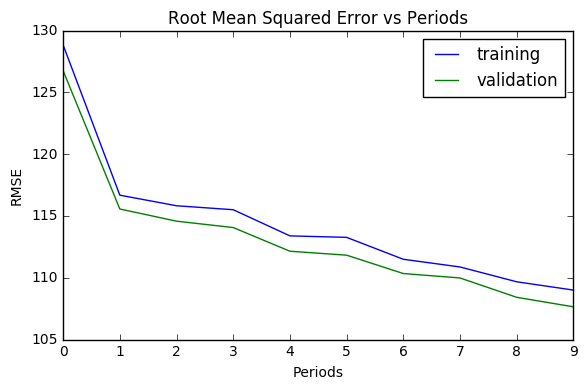

In [8]:
minimal_features_to_train = ['median_income', 'latitude']

minimal_training_examples = training_examples[minimal_features_to_train]
minimal_validation_examples = validation_examples[minimal_features_to_train]

train_model(
    learning_rate=0.01,
    steps=1000,
    batch_size=5,
    training_examples=minimal_training_examples,
    training_targets=training_targets,
    validation_examples=minimal_validation_examples,
    validation_targets=validation_targets
)

In [46]:
#range() function return a list object, xrange() function return a xrange object
#The size allotted using range() is 80064, The size allotted using xrange() is 40
#print(sys.getsizeof(range(1,10000)))
LATITUDE_RANGES = zip(range(32, 44), range(33, 45))

def select_and_transform_features(source_df):
    selected_examples = pd.DataFrame()
    selected_examples["median_income"] = source_df["median_income"]
    for r in LATITUDE_RANGES:
        selected_examples["latitude_%d_to_%d" % r] = source_df["latitude"].apply(lambda l: 1.0 if l >= r[0] and l < r[1] else 0.0)
    return selected_examples

# selected_training_examples = select_and_transform_features(training_examples)
selected_validation_examples = select_and_transform_features(validation_examples)

In [47]:
display.display(selected_training_examples)
display.display(selected_validation_examples)

,median_income,latitude_32_to_33,latitude_33_to_34,latitude_34_to_35,latitude_35_to_36,latitude_36_to_37,latitude_37_to_38,latitude_38_to_39,latitude_39_to_40,latitude_40_to_41,latitude_41_to_42,latitude_42_to_43,latitude_43_to_44
12866,5.0709,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15693,6.8000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13864,6.3197,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3573,4.9766,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637,3.1750,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8227,4.8618,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8390,5.5792,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3657,3.2969,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11481,4.9861,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13083,7.6933,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


,median_income,latitude_32_to_33,latitude_33_to_34,latitude_34_to_35,latitude_35_to_36,latitude_36_to_37,latitude_37_to_38,latitude_38_to_39,latitude_39_to_40,latitude_40_to_41,latitude_41_to_42,latitude_42_to_43,latitude_43_to_44
7095,2.0304,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13492,4.1483,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
596,4.1837,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13284,3.7083,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6390,1.4653,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,1.0000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2946,7.5847,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1504,5.0860,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12492,3.8534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16593,3.3750,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_ps_replicas': 0, '_save_checkpoints_steps': None, '_is_chief': True, '_log_step_count_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002107E5A76D8>, '_task_id': 0, '_service': None, '_master': '', '_model_dir': 'C:\\Users\\STRIKE~1\\AppData\\Local\\Temp\\tmpt435v_z2', '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_num_worker_replicas': 1, '_save_checkpoints_secs': 600, '_save_summary_steps': 100, '_tf_random_seed': None, '_session_config': None, '_task_type': 'worker'}
Training model.... 
RMSE on training data: 
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\STRIKE~1\AppData\Local\Temp\tmpt435v_z2\model.ckpt.
INFO:tensorflow:loss = 207145.69, step = 1
INFO:tensorflow:Saving checkpoints for 50 into C:\Users\STRIKE~1\AppData\Local\Temp\tmpt435v_z2\model.ckpt.
INFO:tensorflow:Loss for final st

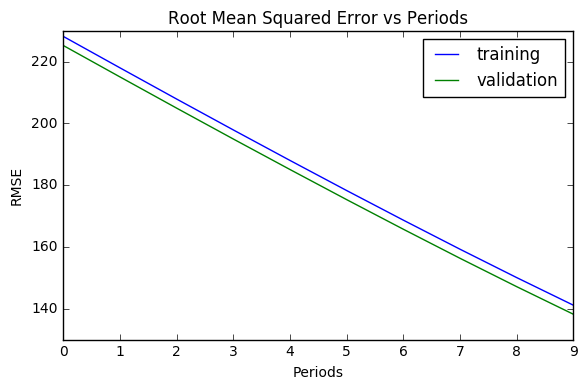

In [48]:
train_model(
    learning_rate=0.01,
    steps=500,
    batch_size=5,
    training_examples=selected_training_examples,
    training_targets=training_targets,
    validation_examples=selected_validation_examples,
    validation_targets=validation_targets)